## User Story 99: User would like to know what apps are similar by rating

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clean_googleplaystoremaster.csv')
df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2138,Lippincott Nursing Advisor,MEDICAL,3.8,343,26000000.0,50000.0,Free,0.0,Everyone,Medical,"May 1, 2018",3.3.1,4.1 and up
515,"Meet24 - Love, Chat, Singles",DATING,4.2,57083,7900000.0,1000000.0,Free,0.0,Mature 17+,Dating,"July 27, 2018",1.31.3,4.0.3 and up
3105,Microsoft Excel,PRODUCTIVITY,4.5,1079616,NaN,100000000.0,Free,0.0,Everyone,Productivity,"July 14, 2018",16.0.10325.20059,4.4 and up
4542,AE Bubble:Offline Bubble Games,FAMILY,4.2,6973,NaN,100000.0,Free,0.0,Everyone,Casual,"October 20, 2017",Varies with device,Varies with device
8937,EI!,PRODUCTIVITY,NaN,0,7700000.0,10.0,Free,0.0,Everyone,Productivity,"July 19, 2018",1.1.14,4.1 and up
9342,Esto Es Guerra TVN,FAMILY,4.5,1303,13000000.0,100000.0,Free,0.0,Everyone,Entertainment,"July 24, 2018",1.7.2,4.1 and up
2443,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5917485,NaN,100000000.0,Free,0.0,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
7224,CP Smart Check List,PERSONALIZATION,NaN,1,3900000.0,10.0,Free,0.0,Everyone,Personalization,"August 14, 2017",0.0.1,4.1 and up
6622,CA Auth ID,TOOLS,3.8,39,375000.0,10000.0,Free,0.0,Teen,Tools,"October 17, 2014",2.2.1,1.6 and up
483,"Meet4U - Chat, Love, Singles!",DATING,4.2,40035,6500000.0,1000000.0,Free,0.0,Mature 17+,Dating,"July 27, 2018",1.31.3,4.0.3 and up


In [397]:
df.shape

(10357, 13)

In [398]:
# get rid of unnecessary columns
df = df[['App', 'Rating', 'Category']]
df.sample(20)

,App,Rating,Category
4258,Easy V-Bux free,4.6,FAMILY
5294,Analog Clock AW-7 PRO,3.3,TOOLS
8491,US DV Lottery 2019,4.6,TRAVEL_AND_LOCAL
6866,Dive-Store.ch,NaN,SPORTS
932,Post Bank,4.5,FINANCE
8466,DV Car Service,4.6,MAPS_AND_NAVIGATION
8368,DS-82 form,NaN,BUSINESS
6896,ricardo.ch,4.0,SHOPPING
6612,iBiznes24 mobile,NaN,FINANCE
1836,Baby Panda’s Juice Shop,4.5,FAMILY


In [399]:
df.shape

(10357, 3)

In [400]:
# check for na
df.isna().sum()

App            0
Rating      1465
Category       0
dtype: int64

In [401]:
df.describe()

,Rating
count,8892.000000
mean,4.187877
std,0.522377
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [402]:
# fill na with mean (close to mean, I wanted to use a number that was already in the set to mirror the shape of the data)
df.loc[ :, 'Rating'] = df.loc[ :, 'Rating'].fillna(4.2)

In [403]:
df.describe()

,Rating
count,10357.000000
mean,4.189592
std,0.484038
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,5.000000


<IPython.core.display.Javascript object>


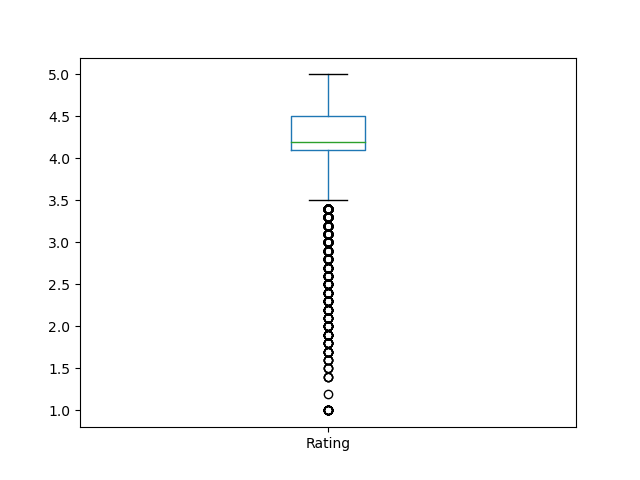

In [404]:
# just checking out the rating distribution
df.plot.box()

In [405]:
# isolating just the ratings between 3.8 and 4.8
final_cluster_df = df[df['Rating'] <= 4.8 ]
final_cluster_df.shape

(9999, 3)

In [406]:
final_cluster_df = final_cluster_df[final_cluster_df['Rating'] >= 3.8 ]
final_cluster_df.shape

(8719, 3)

In [407]:
final_cluster_df.reset_index(inplace=True, drop=True)
final_cluster_df

,App,Rating,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,ART_AND_DESIGN
1,Coloring book moana,3.9,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,ART_AND_DESIGN
3,Sketch - Draw & Paint,4.5,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.3,ART_AND_DESIGN
...,...,...,...
8714,FR Forms,4.2,BUSINESS
8715,Sya9a Maroc - FR,4.5,FAMILY
8716,Parkinson Exercices FR,4.2,MEDICAL
8717,The SCP Foundation DB fr nn5n,4.5,BOOKS_AND_REFERENCE


<IPython.core.display.Javascript object>


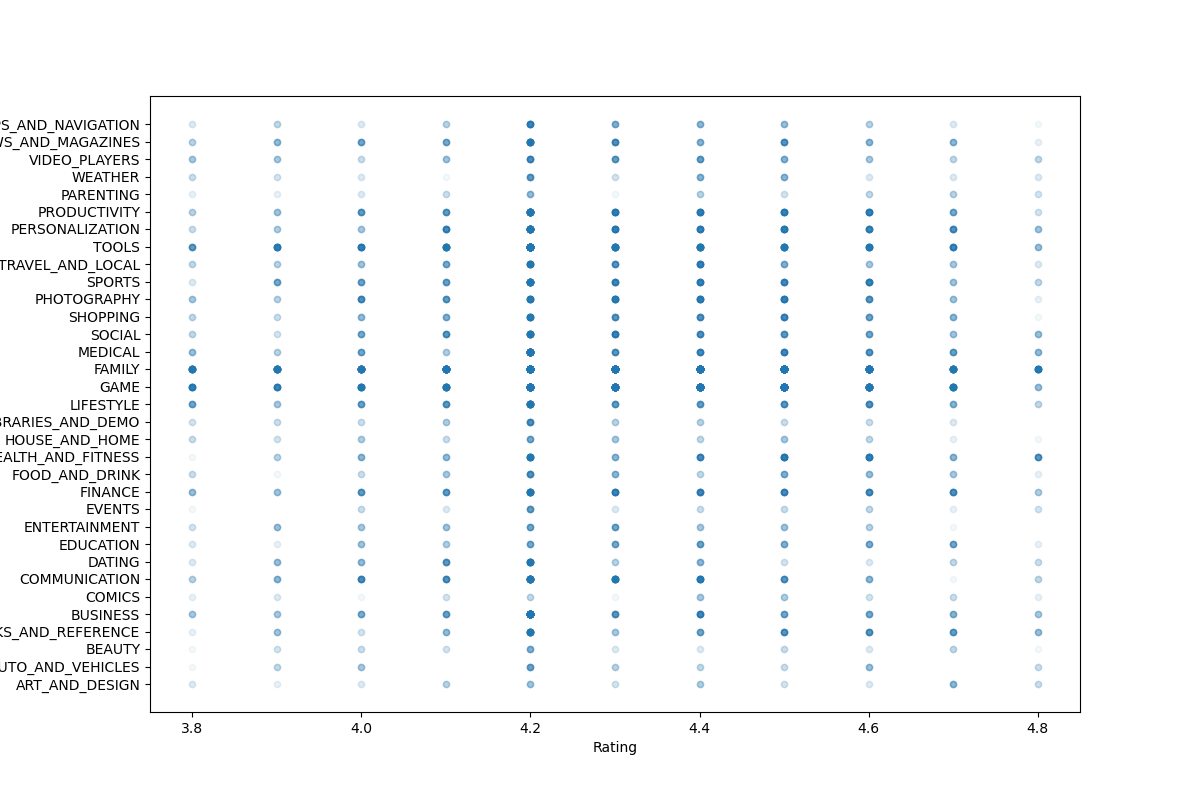

In [408]:
# using alpha levels to help me see the distributions of ratings in each category
final_cluster_df.plot.scatter(x='Rating', y='Category', alpha=0.05, figsize=(12,8));

In [409]:
plt.scatter(x=final_cluster_df['Category'], y=final_cluster_df['Rating'], alpha=0.05);

In [410]:
cluster_df = final_cluster_df.drop(['App'], axis=1)
cluster_df

,Rating,Category
0,4.1,ART_AND_DESIGN
1,3.9,ART_AND_DESIGN
2,4.7,ART_AND_DESIGN
3,4.5,ART_AND_DESIGN
4,4.3,ART_AND_DESIGN
...,...,...
8714,4.2,BUSINESS
8715,4.5,FAMILY
8716,4.2,MEDICAL
8717,4.5,BOOKS_AND_REFERENCE


In [411]:
# checking to see if all of the categories are still here, they are
cluster_df['Category'].drop_duplicates()

0            ART_AND_DESIGN
48        AUTO_AND_VEHICLES
89                   BEAUTY
128     BOOKS_AND_REFERENCE
172                BUSINESS
247                  COMICS
279           COMMUNICATION
402                  DATING
541               EDUCATION
668           ENTERTAINMENT
765                  EVENTS
804                 FINANCE
917          FOOD_AND_DRINK
984      HEALTH_AND_FITNESS
1131         HOUSE_AND_HOME
1186     LIBRARIES_AND_DEMO
1228              LIFESTYLE
1301                   GAME
1636                 FAMILY
1834                MEDICAL
2034                 SOCIAL
2125               SHOPPING
2232            PHOTOGRAPHY
2374                 SPORTS
2478       TRAVEL_AND_LOCAL
2572                  TOOLS
2678        PERSONALIZATION
2772           PRODUCTIVITY
2887              PARENTING
2935                WEATHER
2971          VIDEO_PLAYERS
3013     NEWS_AND_MAGAZINES
3093    MAPS_AND_NAVIGATION
Name: Category, dtype: object

In [412]:
# scale ratings to be between 0 and 1 since I will be one-hot encoding my categoricals
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_df['Rating'] = scaler.fit_transform(cluster_df['Rating'].values.reshape(-1, 1))
cluster_df.head()

,Rating,Category
0,0.3,ART_AND_DESIGN
1,0.1,ART_AND_DESIGN
2,0.9,ART_AND_DESIGN
3,0.7,ART_AND_DESIGN
4,0.5,ART_AND_DESIGN


In [416]:
cluster_df.describe()

,Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
count,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,...,8719.000000,8719.000000,8719.000000,8719.000000,8719.00000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000
mean,0.501480,0.007111,0.007914,0.005735,0.023282,0.039798,0.005161,0.036816,0.016630,0.014566,...,0.040945,0.031884,0.040601,0.022709,0.02787,0.035440,0.075353,0.021791,0.015713,0.008602
std,0.235629,0.084031,0.088612,0.075514,0.150808,0.195496,0.071660,0.188321,0.127889,0.119814,...,0.198174,0.175702,0.197375,0.148983,0.16461,0.184899,0.263975,0.146010,0.124369,0.092352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [415]:
# one-hot encode the categoricals
cluster_df = pd.get_dummies(cluster_df, columns=["Category"])
cluster_df

,Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,0.3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,0.4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8715,0.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8716,0.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8717,0.7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building the Machine Learning Models

In [417]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import AffinityPropagation

In [418]:
def build_model(clustering_model, data):
    
    model = clustering_model(data)
    n_noise = list(model.labels_).count(-1)
    
    print('silhouette score: ', metrics.silhouette_score(data, model.labels_))
    print('n_clusters: ', model.labels_.max() + 1)
    print('n_noise: ', n_noise)

##### KMeans Clustering

In [277]:
def k_means(data, n_clusters=40, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    return model

In [278]:
build_model(k_means, cluster_df)

silhouette score:  0.7177573111559522
n_clusters:  40
n_noise:  0


##### DBSCAN Clustering

In [279]:
def dbscan_fn(data, eps=0.45, min_samples=50):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model

In [280]:
build_model(dbscan_fn, cluster_df)

silhouette score:  0.8102582057123913
n_clusters:  30
n_noise:  152


##### Mean Shift Clustering

In [281]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [282]:
build_model(mean_shift_fn, cluster_df)

silhouette score:  0.819975913125965
n_clusters:  33
n_noise:  0


## Tune Hyperparameters

In [283]:
from sklearn.model_selection import ParameterGrid

##### Mean Shift Clustering

In [284]:
parameters = {'n_clusters' : [20, 25, 30, 35, 40, 45]}
parameter_grid = ParameterGrid(parameters)

In [285]:
list(parameter_grid)

[{'n_clusters': 20},
 {'n_clusters': 25},
 {'n_clusters': 30},
 {'n_clusters': 35},
 {'n_clusters': 40},
 {'n_clusters': 45}]

In [286]:
# initialize some variables so we can find the model with the best score
best_score = -1
model = KMeans()

In [287]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(cluster_df)

    ss = metrics.silhouette_score(cluster_df, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 20} Score:  0.7146894784906
Parameter:  {'n_clusters': 25} Score:  0.7724299504896364
Parameter:  {'n_clusters': 30} Score:  0.8045479274935803
Parameter:  {'n_clusters': 35} Score:  0.7566386774660472
Parameter:  {'n_clusters': 40} Score:  0.7261422306661404
Parameter:  {'n_clusters': 45} Score:  0.7039987734312707


In [291]:
parameters = {'n_clusters' : [24, 26, 28, 30, 32, 34, 36, 38]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 24},
 {'n_clusters': 26},
 {'n_clusters': 28},
 {'n_clusters': 30},
 {'n_clusters': 32},
 {'n_clusters': 34},
 {'n_clusters': 36},
 {'n_clusters': 38}]

In [292]:
best_score = -1
model = KMeans()

In [293]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(cluster_df)
    
    ss = metrics.silhouette_score(cluster_df, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 24} Score:  0.763093087368965
Parameter:  {'n_clusters': 26} Score:  0.778077937968681
Parameter:  {'n_clusters': 28} Score:  0.7943751640173702
Parameter:  {'n_clusters': 30} Score:  0.8044828399148497
Parameter:  {'n_clusters': 32} Score:  0.8141621254167556
Parameter:  {'n_clusters': 34} Score:  0.7821941521571163
Parameter:  {'n_clusters': 36} Score:  0.7323234878935336
Parameter:  {'n_clusters': 38} Score:  0.7172583402019864


In [294]:
parameters = {'n_clusters' : [27, 28, 29, 30, 31, 32, 33, 34, 35]}
parameter_grid = ParameterGrid(parameters)
best_score = -1
model = KMeans()
list(parameter_grid)

[{'n_clusters': 27},
 {'n_clusters': 28},
 {'n_clusters': 29},
 {'n_clusters': 30},
 {'n_clusters': 31},
 {'n_clusters': 32},
 {'n_clusters': 33},
 {'n_clusters': 34},
 {'n_clusters': 35}]

In [295]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(cluster_df)
    
    ss = metrics.silhouette_score(cluster_df, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 27} Score:  0.7860131450383743
Parameter:  {'n_clusters': 28} Score:  0.7423729604098455
Parameter:  {'n_clusters': 29} Score:  0.7546224295289321
Parameter:  {'n_clusters': 30} Score:  0.8058452875666428
Parameter:  {'n_clusters': 31} Score:  0.8100461658304988
Parameter:  {'n_clusters': 32} Score:  0.7651284625590888
Parameter:  {'n_clusters': 33} Score:  0.7403308899846243
Parameter:  {'n_clusters': 34} Score:  0.7821941521571163
Parameter:  {'n_clusters': 35} Score:  0.755541574858766


In [229]:
# here I want to figure out a way to define a function that will output the labels as a pandas series
# then I can append the series to the original dataframe and inspect which categories are similar
# I need to go back and save a copy of the dataframe with the app names still on
# my head may explode, but not in a horrible way

In [296]:
kmeans_model = KMeans(n_clusters=31, max_iter=1000).fit(cluster_df)
kmeans_model_labels = pd.Series(list(kmeans_model.labels_))
ss = metrics.silhouette_score(cluster_df, kmeans_model.labels_)
print('silhouette score: ', ss, 'labels :', kmeans_model_labels)

silhouette score:  0.767638630155483 labels : 0       28
1       28
2       28
3       28
4       28
        ..
8714     2
8715     1
8716     5
8717    12
8718    15
Length: 8719, dtype: int64


In [419]:
final_cluster_df.loc[:, 'kmeans_clusters'] = kmeans_model_labels
final_cluster_df.sample(20)

,App,Rating,Category,kmeans_clusters
1542,Bowmasters,4.7,GAME,3
8136,Etihad Airways,4.1,TRAVEL_AND_LOCAL,19
1192,Luffs,4.2,LIBRARIES_AND_DEMO,18
5424,Br. Parking - Busy road Parking 3D 2018,4.5,FAMILY,1
4263,AJ+ Beta,4.2,NEWS_AND_MAGAZINES,9
6490,"Hulu: Stream TV, Movies & more",4.0,FAMILY,22
1315,Sonic Dash,4.5,GAME,3
7471,EF Coach,4.8,HEALTH_AND_FITNESS,11
5316,BN Pro White Text,4.4,LIBRARIES_AND_DEMO,18
5767,Virtual Walkie Talkie,3.8,COMMUNICATION,14


##### DBSCAN Clustering

In [327]:
parameters = {'eps': [0.1, 0.25, 0.5, 0.75, 1.0],
             'min_samples': [10, 25, 100]}

parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.1, 'min_samples': 10},
 {'eps': 0.1, 'min_samples': 25},
 {'eps': 0.1, 'min_samples': 100},
 {'eps': 0.25, 'min_samples': 10},
 {'eps': 0.25, 'min_samples': 25},
 {'eps': 0.25, 'min_samples': 100},
 {'eps': 0.5, 'min_samples': 10},
 {'eps': 0.5, 'min_samples': 25},
 {'eps': 0.5, 'min_samples': 100},
 {'eps': 0.75, 'min_samples': 10},
 {'eps': 0.75, 'min_samples': 25},
 {'eps': 0.75, 'min_samples': 100},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 25},
 {'eps': 1.0, 'min_samples': 100}]

In [328]:
model = DBSCAN()
best_score = -1

In [329]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(cluster_df)
    
    ss = metrics.silhouette_score(cluster_df, model.labels_)
    n_clusters = model.labels_.max() + 1
    n_noise = list(model.labels_).count(-1)
    print('Parameter: ', g, 'Score: ', ss, 'n_clusters: ', n_clusters, 'n_noise: ', n_noise)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.1, 'min_samples': 10} Score:  0.6083170267609971 n_clusters:  132 n_noise:  329
Parameter:  {'eps': 0.1, 'min_samples': 25} Score:  0.5184500096356224 n_clusters:  83 n_noise:  1079
Parameter:  {'eps': 0.1, 'min_samples': 100} Score:  0.22000730250635692 n_clusters:  24 n_noise:  4010
Parameter:  {'eps': 0.25, 'min_samples': 10} Score:  0.819975913125965 n_clusters:  33 n_noise:  0
Parameter:  {'eps': 0.25, 'min_samples': 25} Score:  0.8159370288771403 n_clusters:  33 n_noise:  24
Parameter:  {'eps': 0.25, 'min_samples': 100} Score:  0.7042364487743982 n_clusters:  19 n_noise:  1245
Parameter:  {'eps': 0.5, 'min_samples': 10} Score:  0.819975913125965 n_clusters:  33 n_noise:  0
Parameter:  {'eps': 0.5, 'min_samples': 25} Score:  0.819975913125965 n_clusters:  33 n_noise:  0
Parameter:  {'eps': 0.5, 'min_samples': 100} Score:  0.76523613839652 n_clusters:  23 n_noise:  654
Parameter:  {'eps': 0.75, 'min_samples': 10} Score:  0.819975913125965 n_clusters:  33 n_noi

In [326]:
dbscan_model = DBSCAN(eps=0.5, min_samples=25).fit(cluster_df)
dbscan_model_labels = pd.Series(list(dbscan_model.labels_))
ss = metrics.silhouette_score(cluster_df, dbscan_model.labels_)
print('silhouette score: ', ss, 'labels :', dbscan_model_labels)

silhouette score:  0.819975913125965 labels : 0        0
1        0
2        0
3        0
4        0
        ..
8714     4
8715    18
8716    19
8717     3
8718    16
Length: 8719, dtype: int64


In [420]:
final_cluster_df.loc[ :, 'dbscan_clusters'] = dbscan_model_labels
final_cluster_df.sample(20)

,App,Rating,Category,kmeans_clusters,dbscan_clusters
3847,W Pro - Weather Forecast & Animated Weather Maps,3.8,WEATHER,27,29
5514,Battery Notifier Pro BT,4.7,TOOLS,4,25
4929,Millionaire Quiz Free: Be Rich,3.8,FAMILY,22,18
2706,Goku Wallpaper Art,4.7,PERSONALIZATION,10,26
795,KudaGo - things to do in NY,4.4,EVENTS,30,10
4900,Comics Reader,3.9,COMICS,28,5
3540,Clock L,3.9,PERSONALIZATION,10,26
3841,Cheat Codes for GTA V,4.3,FAMILY,22,18
3927,Flashlight Ultimate,4.6,TOOLS,4,25
3812,Viber Messenger,4.3,COMMUNICATION,14,6


##### Mean Shift Clustering

In [331]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(cluster_df)

1.4225258327910641

In [341]:
# the bandwidth calculated above caused an error in my silhouette score
# possibly caused by the clusters converging to one
meanshift_model = MeanShift(bandwidth=0.5).fit(cluster_df)
metrics.silhouette_score(cluster_df, meanshift_model.labels_)

0.819975913125965

In [342]:
meanshift_model_labels = pd.Series(list(meanshift_model.labels_))

In [347]:
n_clusters = meanshift_model.labels_.max() + 1
n_noise = list(meanshift_model.labels_).count(-1)
print('n_clusters :', n_clusters, 'n_noise: ', n_noise)

n_clusters : 33 n_noise:  0


In [421]:

final_cluster_df.loc[:, 'meanshift_clusters'] = meanshift_model_labels
final_cluster_df.sample(20)

,App,Rating,Category,kmeans_clusters,dbscan_clusters,meanshift_clusters
7624,TeamWard – live help for LoL,4.8,FAMILY,1,18,0
7328,3G/4G Config Dz,4.2,TOOLS,4,25,2
7325,DZ Puzzle,4.2,FAMILY,22,18,0
5720,GITZ.bz,4.0,SHOPPING,16,21,16
1055,Relax with Andrew Johnson Lite,4.3,HEALTH_AND_FITNESS,11,13,12
5196,BK News Channel,4.6,VIDEO_PLAYERS,17,30,19
1553,Crossy Road,4.5,GAME,3,17,1
3247,CL Mobile - Classifieds for Craigslist,4.4,SHOPPING,16,21,16
2502,AirAsia,3.9,TRAVEL_AND_LOCAL,19,24,17
1202,Essential Resources,4.6,LIBRARIES_AND_DEMO,18,15,24


In [389]:
final_cluster_df.shape

(8719, 5)

In [348]:
# I have no idea why NaN values showed up in the data
# Maybe the noise values are represented by something other than -1
# They show up in every set of labels though and not every algorithm accounts for noise

### Plotting the categories (maybe?)

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

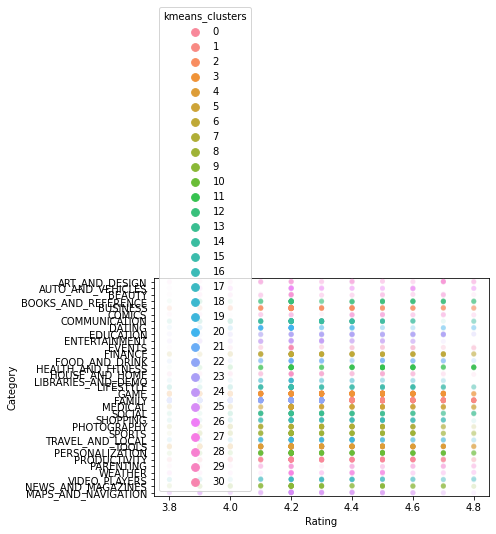

In [470]:
ax = sns.stripplot(y=final_cluster_df['Category'], x=final_cluster_df['Rating'], hue=final_cluster_df['kmeans_clusters'], jitter=True, alpha=0.1)

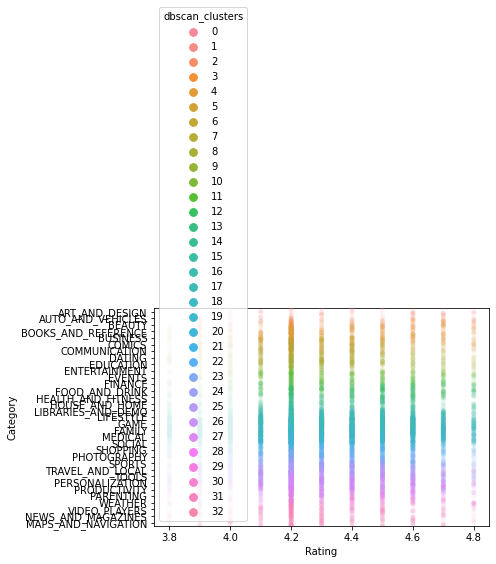

In [434]:

sns.stripplot(y=final_cluster_df['Category'], x=final_cluster_df['Rating'], hue=final_cluster_df['dbscan_clusters'], jitter=2, alpha=0.1)

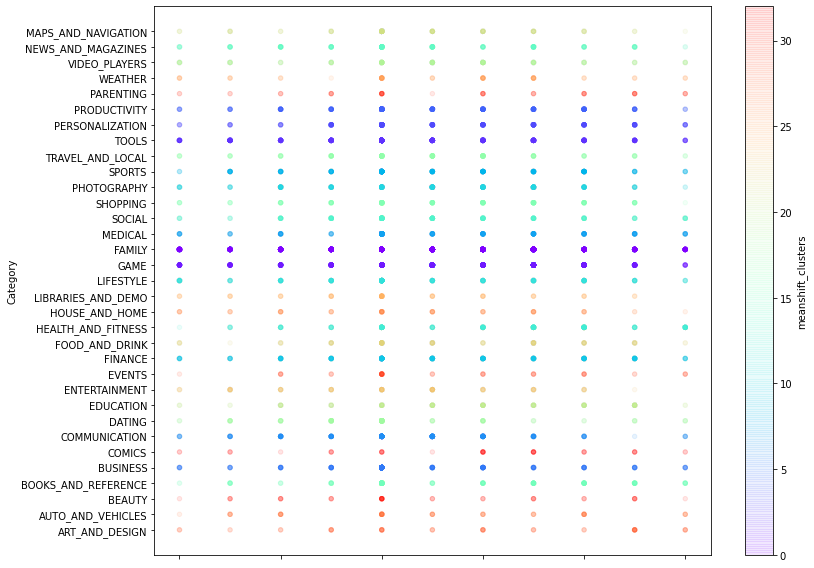

In [488]:
final_cluster_df.plot.scatter(x='Rating', y='Category', c='meanshift_clusters', cmap='rainbow', alpha=0.1, figsize=(12,8))
plt.tight_layout()
plt.savefig('meanshift_clusters.png')

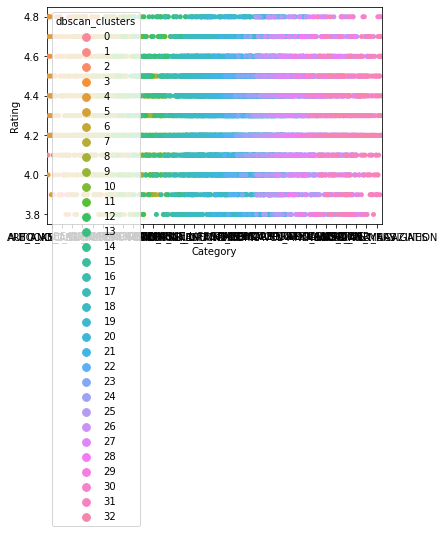

In [485]:
sns.stripplot(x='Category', y='Rating', hue='dbscan_clusters', data=final_cluster_df, jitter=5)  

In [435]:
final_cluster_df.to_csv('GPS_clusters.csv')

In [436]:
final_cluster_df.head(20)

,App,Rating,Category,kmeans_clusters,dbscan_clusters,meanshift_clusters
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,ART_AND_DESIGN,28,0,28
1,Coloring book moana,3.9,ART_AND_DESIGN,28,0,28
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,ART_AND_DESIGN,28,0,28
3,Sketch - Draw & Paint,4.5,ART_AND_DESIGN,28,0,28
4,Pixel Draw - Number Art Coloring Book,4.3,ART_AND_DESIGN,28,0,28
5,Paper flowers instructions,4.4,ART_AND_DESIGN,28,0,28
6,Smoke Effect Photo Maker - Smoke Editor,3.8,ART_AND_DESIGN,28,0,28
7,Infinite Painter,4.1,ART_AND_DESIGN,28,0,28
8,Garden Coloring Book,4.4,ART_AND_DESIGN,28,0,28
9,Kids Paint Free - Drawing Fun,4.7,ART_AND_DESIGN,28,0,28


In [438]:
kmeans = final_cluster_df.groupby('kmeans_clusters')
for key, item in kmeans:
    print(kmeans.get_group(key), "\n\n")

                                                    App  Rating      Category  \
2772                                     Microsoft Word     4.5  PRODUCTIVITY   
2773  All-In-One Toolbox: Cleaner, Booster, App Manager     4.7  PRODUCTIVITY   
2774                               Adobe Acrobat Reader     4.3  PRODUCTIVITY   
2775      AVG Cleaner – Speed, Battery & Memory Booster     4.4  PRODUCTIVITY   
2776                                       Google Drive     4.4  PRODUCTIVITY   
...                                                 ...     ...           ...   
8524                                      Fort Myers FL     4.2  PRODUCTIVITY   
8534                                     MY GULFPORT FL     4.2  PRODUCTIVITY   
8583                                       Future Cloud     4.6  PRODUCTIVITY   
8656                                           FQ METER     3.9  PRODUCTIVITY   
8702                                          PLMGSS FR     4.2  PRODUCTIVITY   

      kmeans_clusters  dbsc

[266 rows x 6 columns] 


                                                    App  Rating  Category  \
2125                                 Amazon for Tablets     4.0  SHOPPING   
2126                           Wish - Shopping Made Fun     4.5  SHOPPING   
2127                      OfferUp - Buy. Sell. Offer Up     4.6  SHOPPING   
2128                     Shopee - No. 1 Online Shopping     4.3  SHOPPING   
2129                       Shopee: No.1 Online Shopping     4.2  SHOPPING   
...                                                 ...     ...       ...   
8124                                            Tenh Ey     4.2  SHOPPING   
8259  FirstCry Baby & Kids Shopping, Fashion & Paren...     4.1  SHOPPING   
8550                                         WICShopper     3.9  SHOPPING   
8611                              Lalafo Pulsuz Elanlar     4.4  SHOPPING   
8642                     Slickdeals: Coupons & Shopping     4.5  SHOPPING   

      kmeans_clusters  dbscan_clusters  meanshift

In [449]:
kmeans.get_group(30).shape

(55, 6)

In [450]:
### CURRENT TO DO LIST #######################

#  X-rearrange my data situation so I immediately slice out the ratings I want
#  X-figure out the chained indexing situation so my df isnt sketch
#  look into setting different distance parameters (or just talk about it in the discussion)
#  doing everything without normalizing the data
#  groupby() or transpose the cluster labels to see which apps were clustered together

In [452]:
final_cluster_df.sample(50).sort_values('kmeans_clusters')

,App,Rating,Category,kmeans_clusters,dbscan_clusters,meanshift_clusters
4058,Ad Remove Plugin for App2SD,4.1,PRODUCTIVITY,0,27,4
5954,Chrome Canary (Unstable),4.3,PRODUCTIVITY,0,27,4
2814,MEGA,4.0,PRODUCTIVITY,0,27,4
2844,Google Docs,4.3,PRODUCTIVITY,0,27,4
7443,New Holland Agriculture T5 EC,4.6,PRODUCTIVITY,0,27,4
5145,Eating Show - Food BJ,4.4,FAMILY,1,18,0
5165,BJ Adams,4.2,BUSINESS,2,4,5
3959,Pixel Z Gunner 3D - Battle Survival Fps,4.2,GAME,3,17,1
4747,Clash of Axe: Flippy Lumberjack Action X,4.3,GAME,3,17,1
4788,Mad Day - Truck Distance Game,4.3,GAME,3,17,1


In [464]:
final_cluster_df.sample(50).sort_values('Category')

,App,Rating,Category,kmeans_clusters,dbscan_clusters,meanshift_clusters
6359,Learn CT Scan Of Head,4.1,BOOKS_AND_REFERENCE,12,3,15
5990,CI View,4.2,BUSINESS,2,4,5
380,Video Caller Id,4.2,COMMUNICATION,14,6,6
3779,"U - Webinars, Meetings & Messenger",4.1,COMMUNICATION,14,6,6
446,FlirtChat - ♥Free Dating/Flirting App♥,4.3,DATING,20,7,18
510,i miss you quotes and photos,4.2,DATING,20,7,18
520,Titanic App - Feminist Dating Application,4.5,DATING,20,7,18
652,Lerni. Learn languages.,4.0,EDUCATION,23,8,20
7571,Yeled EI,4.2,FAMILY,22,18,0
4416,The Hunt for the Lost Treasure,4.6,FAMILY,1,18,0


In [455]:
final_cluster_df.loc[ final_cluster_df['dbscan_clusters'] == np.nan, :]

,App,Rating,Category,kmeans_clusters,dbscan_clusters,meanshift_clusters


In [459]:
final_cluster_df.isna().sum()

App                   0
Rating                0
Category              0
kmeans_clusters       0
dbscan_clusters       0
meanshift_clusters    0
dtype: int64

In [460]:
final_cluster_df['dbscan_clusters'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [467]:
final_cluster_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)